In [1]:
import math
from copy import deepcopy
from typing import List, Tuple

import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras

from src.models.geometric_figure import GeometricFigure
from src.services.geometric_figure import (get_geometric_figures,
                                           plot_geometric_figures,
                                           prediction_to_category,
                                           get_input_and_output)

In [2]:
IMAGE_SIZE = (512, 512)
DATA_VERSION = '2023-04-02'
MODEL_PATH = 'data/models/2023-03-22/P1/2023-04-06 18-25-57.h5'

In [3]:
geometric_figures: List[GeometricFigure] = get_geometric_figures(f'data/{DATA_VERSION}', IMAGE_SIZE, memorize=True)
print(f'Loaded {len(geometric_figures)} geometric figures')

Loaded 448 geometric figures


In [4]:
model = keras.models.load_model(MODEL_PATH)

In [5]:
x, y = zip(*[get_input_and_output(gf) for gf in geometric_figures])
x = np.array(x)
y = np.array(y)
loss, accuracy = model.evaluate(x, y)
print(f'Loss: {loss:.2f}')
print(f'Accuracy: {accuracy:.2%}')

14/14 [==============================] - 1s 32ms/step - loss: 2.3157 - accuracy: 0.7969
Loss: 2.32
Accuracy: 79.69%


In [6]:
geometric_figures_error_predictions: List[Tuple[GeometricFigure, str]] = []
predictions = model.predict(x)
for i, prediction in enumerate(predictions):
    if prediction_to_category(prediction) != geometric_figures[i]['category']:
        geometric_figures_error_predictions.append((geometric_figures[i], prediction_to_category(prediction)))
print(f'Predicted {len(geometric_figures_error_predictions)} geometric figures with error')

Predicted 91 geometric figures with error


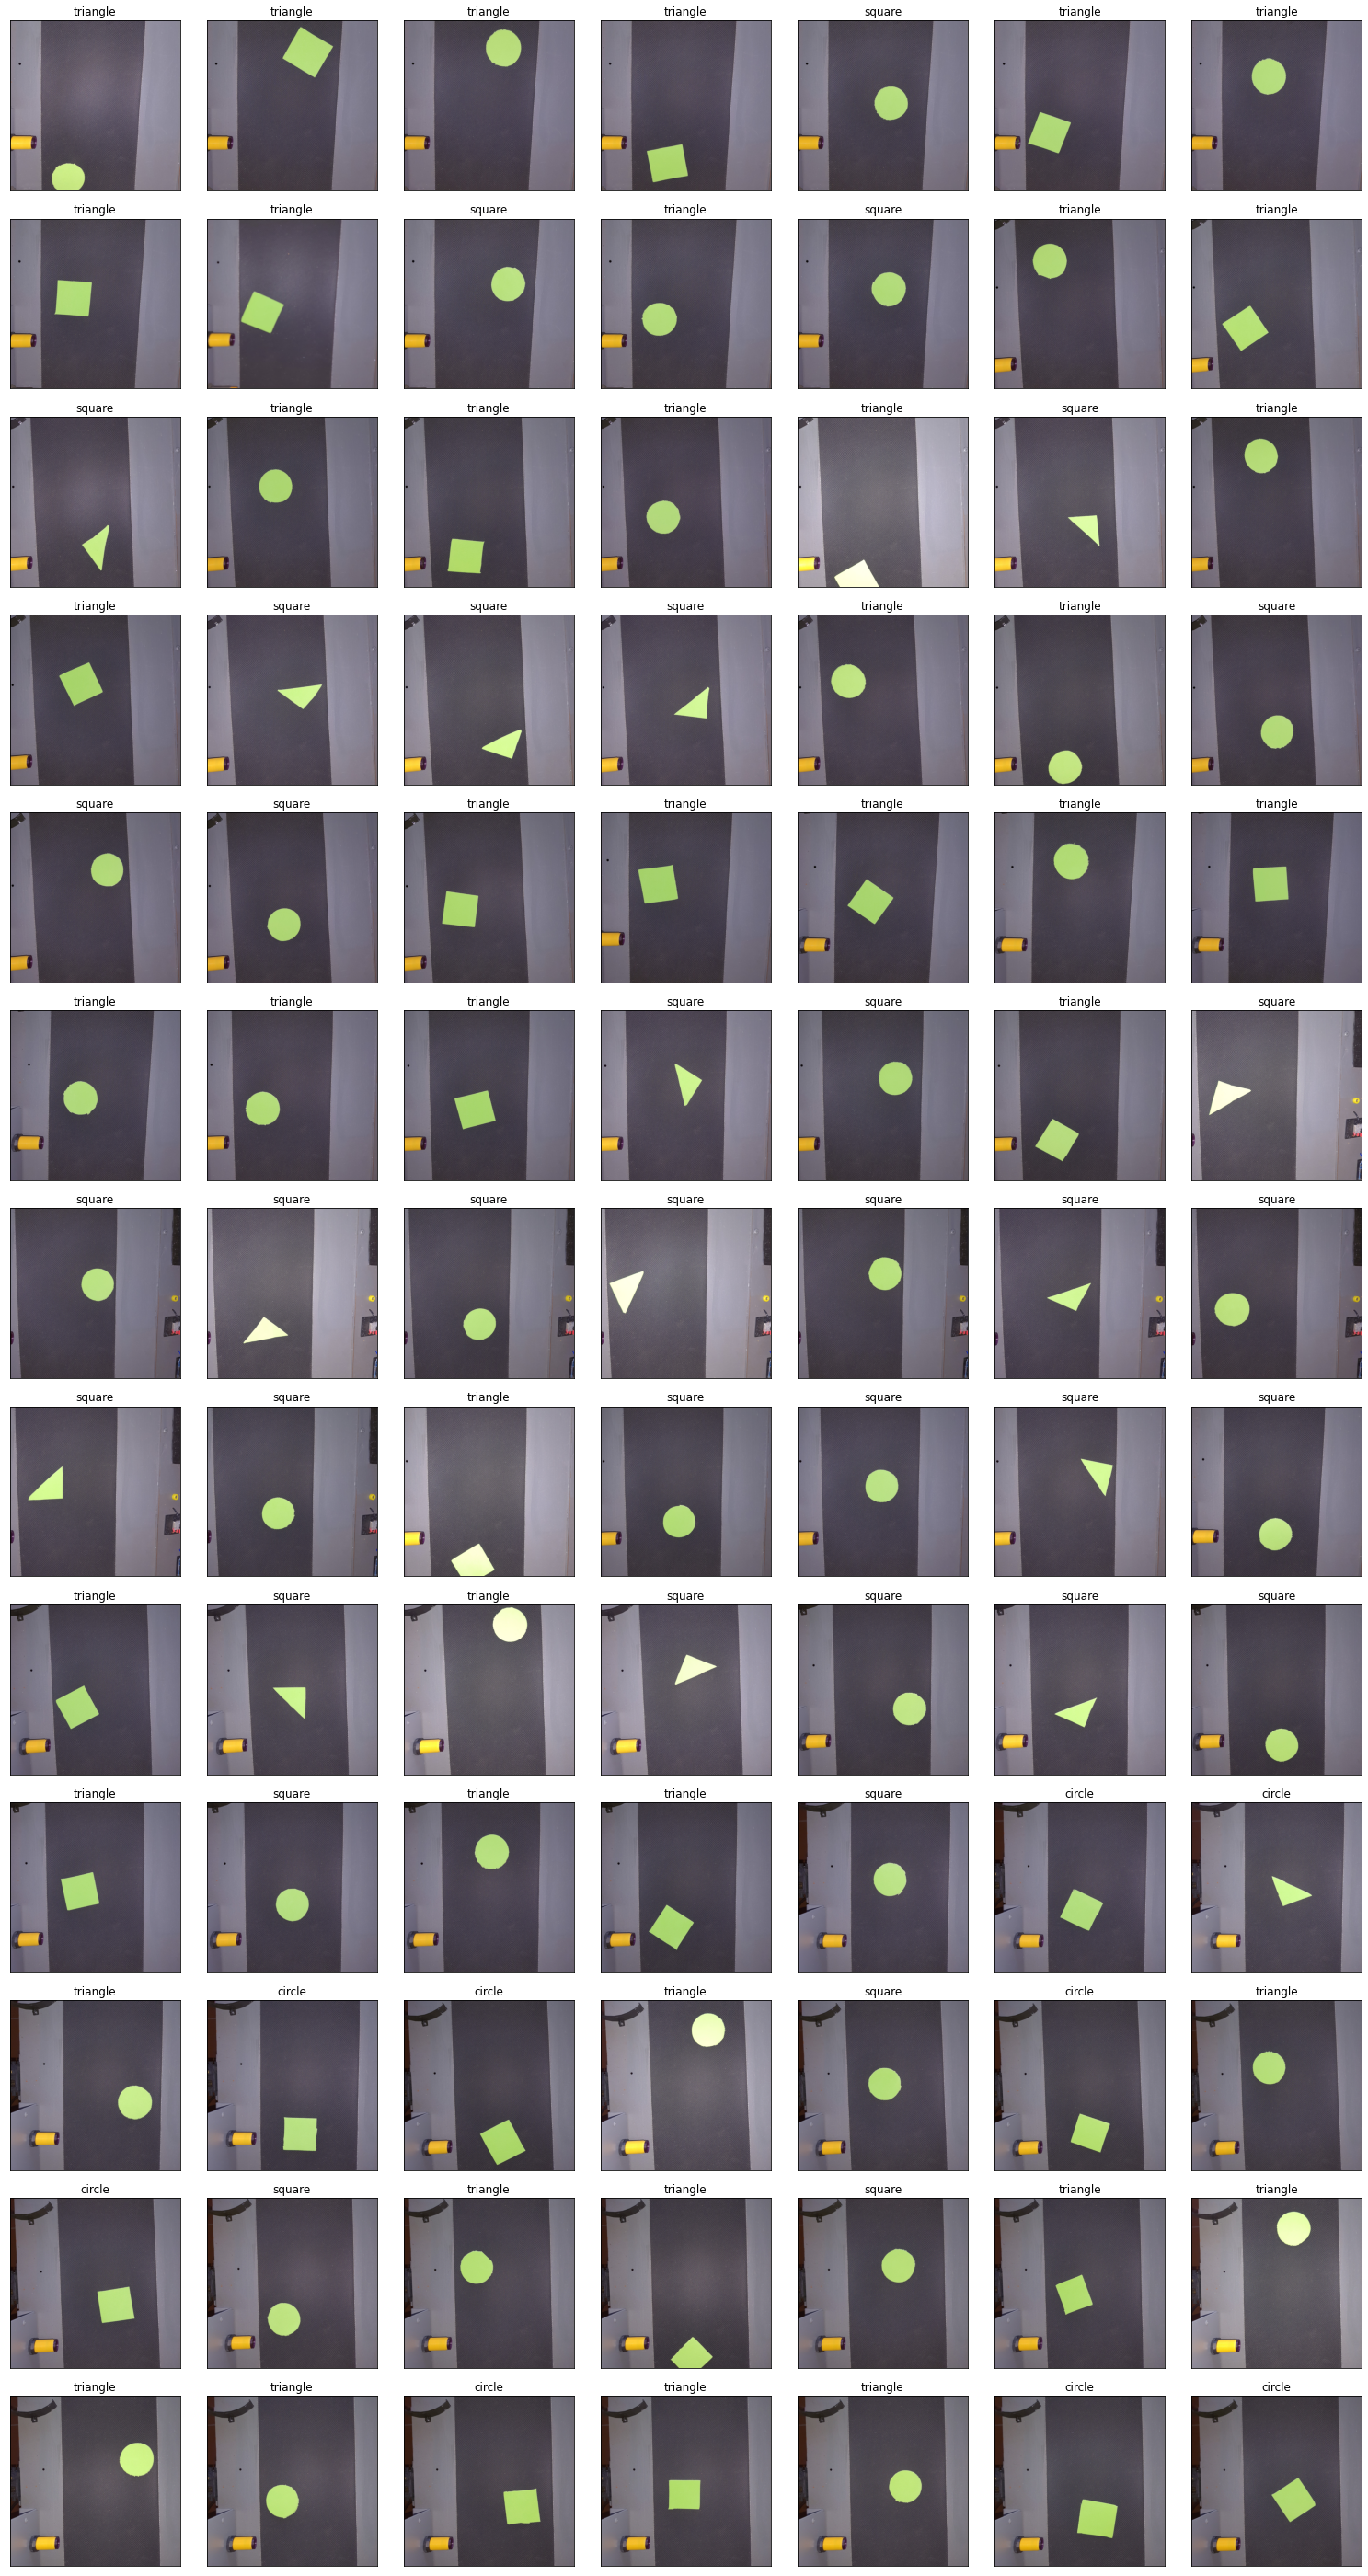

In [7]:
plot_size = 3
columns = 7
rows = math.ceil(len(geometric_figures_error_predictions)/columns)
error_geometric_figures: List[GeometricFigure] = []
for gf, prediction in geometric_figures_error_predictions:
    new_gf = deepcopy(gf)
    new_gf['category'] = prediction
    error_geometric_figures.append(new_gf)
if len(error_geometric_figures) > 0:
    plot_geometric_figures(error_geometric_figures, columns, plot_size)
    plt.show()